## Language Processing for Twitter, FB, Insta

This is using TextBlob (NLTK), Pandas, and data extracted using the social media scrapers I created.

In order to download TextBlob you must download the conda version in the AnacondaPrompt

$ conda install -c conda-forge textblob

In [1]:
# Importing necessary packages and variables for .csv files

In [4]:
import os
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

pd.set_option("display.max_colwidth", None)

tweets = pd.read_csv("tweets.csv",sep="|")
fb = pd.read_csv("fb_comments.csv",sep="|")
insta = pd.read_csv("insta_comments.csv")

tweets = tweets.drop_duplicates(keep=False)
fb = fb.drop_duplicates(keep=False)
insta = insta.drop_duplicates(keep=False)

insta['insta_text'] = insta['insta_text'].astype(str)

**Ran into an issue with this specific line, since the user is verified they have an additional column.  Will need to handle this for future scrapes.**
jayelectronica|Verified|Man don’t make me go beak the law this early in the morning!|2w5 likesReply|View replies (2)

## Preview of data from .csv files

In [5]:
fb.head(3)

,fb_name,fb_text,fb_time
1,Daniel Jozwiak,Maybe 5. Others I think ur just ducking down. Still awesome ride.,2021-03-28
2,Dustin Montalvo,7. So how many miles is that bike gonna have when u give it away lol,2021-03-28
3,Aaron Printup,6 I think,2021-03-28


In [6]:
insta.head(3)

,insta_name,insta_text,insta_time,no_reply
1,eezerider,To a track Day and dinner afterwards.,23h1 likeReply,View replies (1)
2,james_dodson13,I'll take slick to chipotle,1d2 likesReply,View replies (1)
5,space2489eady,Oh no where lol but my house ima hide her in my garage until she listens to me 😂😂😂,23h1 likeReply,View replies (1)


In [7]:
tweets.head(3)

,tweet_name,tweet_text,tweet_time
0,Luimoto,🔥We've recently been outfitting @RideClutch with our designer seat covers. Check out their latest giveaway bikes 👇 Kawasaki Ninja H2 and the Honda CBR1000-RR Fireblade SP: https://t.co/MKVbkw9YSJ #Luimoto #RideClutch #HondaFirebladeSP #KawasakiNinjaH2 https://t.co/uhArOBwA9V,2021-05-20
1,cycle_law,The Kawasaki Ninja H2 is a flamethrower 🔥🔥 What causes the flames 🔥 @rideclutch @derwek @arizonasportbikedevelopment #rideclutch #kawasaki #ninjah2 #cyclelaw #dynotest #bikelife https://t.co/OB4LAehA3n,2021-05-07
2,SteveYa08701736,@RonCapps28 @gearwrench @LVMotorSpeedway I need this set so sorry but @RideClutch I need the set to fix the H2,2021-04-24


## Utilizing TextBlob for polarity/subjectivity

**Polarity** ranges from -1 (most negative) to 1 (most positive)

**Subjectivity** ranges from -1 (very objective) to 1 (very subjective)


_objective is more factual and subjective is more emotion based_

**Need to make edits so TextBlob is more accurate in reading text, I can see that it is not picking up data from some rows**

### Facebook

In [8]:
fb_blob = [TextBlob(fb_line) for fb_line in fb['fb_text']]

fb['fb_polar'] = [b.sentiment.polarity for b in fb_blob]
fb['fb_subj'] = [b.sentiment.subjectivity for b in fb_blob]

In [9]:
fb.head(3)

,fb_name,fb_text,fb_time,fb_polar,fb_subj
1,Daniel Jozwiak,Maybe 5. Others I think ur just ducking down. Still awesome ride.,2021-03-28,0.422222,0.644444
2,Dustin Montalvo,7. So how many miles is that bike gonna have when u give it away lol,2021-03-28,0.650000,0.600000
3,Aaron Printup,6 I think,2021-03-28,0.000000,0.000000


**Since we are showing 0.000000 values, I created a mask to remove them and variable for clean dataframe**

In [10]:
fb_zero_p = fb['fb_polar'] != 0.000000
fb_zero_s = fb['fb_subj'] != 0.000000

fb_df = fb[fb_zero_p & fb_zero_s]

In [11]:
fb_df.head()

,fb_name,fb_text,fb_time,fb_polar,fb_subj
1,Daniel Jozwiak,Maybe 5. Others I think ur just ducking down. Still awesome ride.,2021-03-28,0.422222,0.644444
2,Dustin Montalvo,7. So how many miles is that bike gonna have when u give it away lol,2021-03-28,0.650000,0.600000
5,Mike Allen,You popped 8 maybe 9 if you count your tire coming an inch off the ground a wheelie lmao #Brrraaappppp!!,2021-03-28,0.937500,1.000000
8,Logan Chester Tenney,My fav number 8!!!! It’s meant to be!!!! My dream bike!!!!! Good luck to all!!!!,2021-03-28,1.000000,0.600000
10,Michael Morris,5 for the s1k and 1 and a half for the h2. 🤣😂,2021-03-28,-0.166667,0.166667


### Instagram

In [12]:
insta_blob = [TextBlob(insta_line) for insta_line in insta['insta_text']]

insta['insta_polar'] = [b.sentiment.polarity for b in insta_blob]
insta['insta_subj'] = [b.sentiment.subjectivity for b in insta_blob]

In [13]:
insta.head(3)

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
1,eezerider,To a track Day and dinner afterwards.,23h1 likeReply,View replies (1),0.00,0.000
2,james_dodson13,I'll take slick to chipotle,1d2 likesReply,View replies (1),-0.25,0.375
5,space2489eady,Oh no where lol but my house ima hide her in my garage until she listens to me 😂😂😂,23h1 likeReply,View replies (1),0.80,0.700


**Since we are showing 0.000000 values, I created a mask to remove them and variable for clean dataframe**

In [14]:
insta_zero_p = insta['insta_polar'] != 0.000000
insta_zero_s = insta['insta_subj'] != 0.000000

insta_df = insta[insta_zero_p & insta_zero_s]

In [15]:
insta_df.head()

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
2,james_dodson13,I'll take slick to chipotle,1d2 likesReply,View replies (1),-0.2500,0.375000
5,space2489eady,Oh no where lol but my house ima hide her in my garage until she listens to me 😂😂😂,23h1 likeReply,View replies (1),0.8000,0.700000
19,therealsethmueller,The first sunday bike meet i come across!,19h1 likeReply,NaN,0.3125,0.333333
25,therogueronin,The grand canyon,22h1 likeReply,NaN,0.5000,1.000000
27,drewslack06,fuck the bike im takin @slickerspeed to Chipotle its her favorite restaurant!,18h2 likesReply,View replies (4),0.1125,0.800000


### Twitter

In [16]:
twitter_blob = [TextBlob(twitter_line) for twitter_line in tweets['tweet_text']]

tweets['tweet_polar'] = [b.sentiment.polarity for b in twitter_blob]
tweets['tweet_subj'] = [b.sentiment.subjectivity for b in twitter_blob]

In [17]:
tweets.head(3)

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
0,Luimoto,🔥We've recently been outfitting @RideClutch with our designer seat covers. Check out their latest giveaway bikes 👇 Kawasaki Ninja H2 and the Honda CBR1000-RR Fireblade SP: https://t.co/MKVbkw9YSJ #Luimoto #RideClutch #HondaFirebladeSP #KawasakiNinjaH2 https://t.co/uhArOBwA9V,2021-05-20,0.25,0.575
1,cycle_law,The Kawasaki Ninja H2 is a flamethrower 🔥🔥 What causes the flames 🔥 @rideclutch @derwek @arizonasportbikedevelopment #rideclutch #kawasaki #ninjah2 #cyclelaw #dynotest #bikelife https://t.co/OB4LAehA3n,2021-05-07,0.00,0.000
2,SteveYa08701736,@RonCapps28 @gearwrench @LVMotorSpeedway I need this set so sorry but @RideClutch I need the set to fix the H2,2021-04-24,-0.50,1.000


**Since we are showing 0.000000 values, I created a mask to remove them and variable for clean dataframe**

In [18]:
tweet_zero_p = tweets['tweet_polar'] != 0.000000
tweet_zero_s = tweets['tweet_subj'] != 0.000000

tweet_df = tweets[tweet_zero_p & tweet_zero_s]

In [19]:
tweet_df.head()

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
0,Luimoto,🔥We've recently been outfitting @RideClutch with our designer seat covers. Check out their latest giveaway bikes 👇 Kawasaki Ninja H2 and the Honda CBR1000-RR Fireblade SP: https://t.co/MKVbkw9YSJ #Luimoto #RideClutch #HondaFirebladeSP #KawasakiNinjaH2 https://t.co/uhArOBwA9V,2021-05-20,0.250000,0.575000
2,SteveYa08701736,@RonCapps28 @gearwrench @LVMotorSpeedway I need this set so sorry but @RideClutch I need the set to fix the H2,2021-04-24,-0.500000,1.000000
4,Luimoto,Keep an eye out for more Luimoto Seat Covers on some upcoming Ride Clutch Give Aways! #Luimoto #HondaMotorcycles #HondaFireBlade #Motorcycles #MotorcycleAccessories #LuimotoDesignerSeatCovers #MadeinCanda #RideClutch https://t.co/ODSnn7IzBt,2021-04-13,0.625000,0.500000
5,WraithPhotos,"Lol thanks @rideclutch, it's perfect. @ Saint Cloud, Minnesota https://t.co/DUrvmIwTD8",2021-04-10,0.666667,0.633333
8,emir_orbita,Thank you @rideclutch for choosing me as one of your random winners from your YouTube channel giveaway! I just got my prize today! #prizegiveaway #prizewinner #winner #nowfortheraffle😅 #crossingmyfingers 🤞 https://t.co/crpQuKMFrb,2021-01-22,-0.781250,0.500000


## Sorting by polarity

### Highest (most positive)

In [20]:
 # Facebook high polarity
fb_h_pol = fb_df.sort_values(by='fb_polar',ascending=False)

fb_h_pol[:10]

,fb_name,fb_text,fb_time,fb_polar,fb_subj
8,Logan Chester Tenney,My fav number 8!!!! It’s meant to be!!!! My dream bike!!!!! Good luck to all!!!!,2021-03-28,1.000000,0.600000
5,Mike Allen,You popped 8 maybe 9 if you count your tire coming an inch off the ground a wheelie lmao #Brrraaappppp!!,2021-03-28,0.937500,1.000000
2,Dustin Montalvo,7. So how many miles is that bike gonna have when u give it away lol,2021-03-28,0.650000,0.600000
69,Justin Thornton,Gotta say left! That thing is beautiful!,2021-05-26,0.500000,0.500000
15,Huey Uchiha,7 😅 idk but that H2! Haha looks sooo nice!,2021-03-28,0.475000,0.650000
63,Steve Dahietl,RIGHT all day man that thing is amazing 🤩,2021-05-26,0.442857,0.717857
1,Daniel Jozwiak,Maybe 5. Others I think ur just ducking down. Still awesome ride.,2021-03-28,0.422222,0.644444
58,Craig Slanina,Lol the letft one all the way even though I'm a big guy never drove One besides a piece of junk Yamaha 650 that I wrecked because the transmission dropped to gears,2021-05-27,0.400000,0.400000
70,Cristian Abrego,RIGHT! 🤞🏼,2021-05-26,0.357143,0.535714
59,Dillan Catrone,Left all day!!! Would be a amazing track bike.,2021-05-26,0.300000,0.450000


In [21]:
# Instagram high polarity
insta_h_p = insta_df.sort_values(by='insta_polar',ascending=False)

insta_h_p[:10]

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
1308,24krepair,Awesome,2wReply,NaN,1.000000,1.000000
1366,mssinam,God... she’s so fucking GORGEOUS!!! 😍😍🔥🔥🔥🔥,3w2 likesReply,View replies (1),1.000000,0.900000
929,username_taken_everytime,H2 going on some wonderful twistys 🤩,1w1 likeReply,NaN,1.000000,1.000000
1237,jalves565,Need the h2 perfect 🙌,2wReply,NaN,1.000000,1.000000
1491,onlystephflores,Would be an amazing upgrade! I hope I win !,4w1 likeReply,View replies (1),0.875000,0.650000
1162,stevenwilliams5590,IT WOULD BE A BLESSING TO WIN ONE OF MY DREAM BIKES AND ANOTHER FOR MY BEST FRIEND. GOOD LUCK EVERYONE.,2wReply,NaN,0.833333,0.433333
1318,bladebike_razer,I entered I hope I win,2wReply,NaN,0.800000,0.400000
5,space2489eady,Oh no where lol but my house ima hide her in my garage until she listens to me 😂😂😂,23h1 likeReply,View replies (1),0.800000,0.700000
382,coletonwilkinson,Can i win both bikes and no cash? 🤣💯🔥,2d1 likeReply,View replies (1),0.800000,0.400000
1093,mr_watchmework,Gotta play to win,2w1 likeReply,NaN,0.800000,0.400000


In [22]:
# Twitter high polarity
tweet_h_p = tweet_df.sort_values(by='tweet_polar',ascending=False)

tweet_h_p[:10]

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
28,pazzo_racing,Posted withregram • rideclutch We could all use a Yamaha R1 + $5000.. So why not get entered to WIN? Go follow rideclutch and check out the link in their bio for info on how you could go home with this bike 😍 ps it… https://t.co/zVGm28nfd5,2020-01-29,0.800000,0.400000
10,OliverHansHerre,"Praying to the Gods to win the Lotto, Pappy Van Winkle, and #rideclutch to win all of it and become the luckiest. Pray for me. #blessing #LotteryTickets #wishfulthinking",2021-01-19,0.800000,0.400000
5,WraithPhotos,"Lol thanks @rideclutch, it's perfect. @ Saint Cloud, Minnesota https://t.co/DUrvmIwTD8",2021-04-10,0.666667,0.633333
4,Luimoto,Keep an eye out for more Luimoto Seat Covers on some upcoming Ride Clutch Give Aways! #Luimoto #HondaMotorcycles #HondaFireBlade #Motorcycles #MotorcycleAccessories #LuimotoDesignerSeatCovers #MadeinCanda #RideClutch https://t.co/ODSnn7IzBt,2021-04-13,0.625000,0.500000
32,BikerAholic,It’s a beautiful day! ☀️ It’s Saturday let’s ride!! 🏍😍💯✌🏻 ➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖ #Repost srtjd ・・・ Who is ready for this weekend? 🙋🏻‍♀️ • 📸: @davidruizolmedo • Shirt from rideclutch. Every dollar spent… https://t.co/gHuN8m3guy,2019-06-01,0.600000,0.750000
24,Jesse96Ward,Couldn't have asked for a better day to be out with Bumblebee cruising some back roads today! Beautiful day with some beautiful views!! #photography #photoshoot #bikelife #daretolive #riderich #rideclutch… https://t.co/dTcoNzY8nq,2020-05-17,0.587500,0.625000
31,Jonatha48624150,"Great fun hanging with the guys from rideclutch yesterday ! Thank you for the opportunity of working on another beautiful machine 😍. I really like the quality of materials on the #toceexhaust , and American made… https://t.co/zlZagju4RG",2019-06-04,0.445000,0.430000
23,SamuraiHg,That rev limiter 😍😍😍 #Repost @sportbikelife • • • • • • @thekilacam ••• Testing out his new full system SPX Carbon Fiber @cobraexhaust 🔥 ✖️ WHAT DO YALL THINK? 👀 ✖️ LOLOL THAT REV LIMITER THOUGH 😂 #sportbikelife #rideclutch https://t.co/wkDD9KOGRf,2020-05-18,0.428788,0.601515
21,hugosays,"as much as i would love to win a car, truck, or motorcycle from rideclutch, it's such a squid website i can't support it",2020-06-03,0.375000,0.425000
17,MindOfAndrew,@FaZeApex @ryanfcrew Is extremely smart with set ups and adding creative detail. I'd encourage you to reach out to him. He did the photo room set up for RideClutch House (Sport Bike &amp; Influencer company),2020-10-02,0.357143,0.821429


### Lowest (least positive)

In [23]:
# Facebook low polarity
fb_l_p = fb_df.sort_values(by='fb_polar',ascending=True)

fb_l_p[:10]

,fb_name,fb_text,fb_time,fb_polar,fb_subj
11,Will Benefield,"Sick ride! I counted 4 wheelies, Derrek’s baby wheelie, and Ryan’s 3rd gear pull that lifted the nose a bit. 😂",2021-04-28,-0.446429,0.428571
64,Isaac Morales,Just put them behind a curtain and I’ll pick a curtain and get what I get. 🤗. Any of them would be a blessing. Or through the keys in a hat 🎩 even clutch truck ones hehe 😜,2021-05-26,-0.400000,0.700000
19,Jakob Hall,At least 2,2021-05-21,-0.300000,0.400000
10,Michael Morris,5 for the s1k and 1 and a half for the h2. 🤣😂,2021-03-28,-0.166667,0.166667
47,Charles Davis,Final answer 6 if you include cur scene from previous beemer,2021-03-28,-0.083333,0.583333
68,Jose Lopez,This is a tough decision but right is fire 🔥 🔥🔥,2021-05-26,-0.051587,0.684524
62,Eric Charles Curry,Right hand green side everyday,2021-05-26,-0.038095,0.478571
46,Jordan Gallemore,when will the store be restocked? been trying to buy the backpack and a snapback cap for awhile... now i need another hang the f up and drive hoodie my other ones getting very churchy.. holes in it. holy. har har har. ty,2021-05-07,0.037500,0.337500
60,Andy Gonzalez,It’s choosing to have two seats (left) or just one (right) imma have to go with the left side.,2021-05-26,0.095238,0.178571
17,Bikal Thapa,need help to get my self a action camera to start moto vlogging 😢,2021-05-21,0.100000,0.100000


In [24]:
# Insta low polarity
insta_l_p = insta_df.sort_values(by='insta_polar',ascending=True)

insta_l_p[:10]

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
1096,mr_watchmework,That was tough!!! The swerve and pull up!!!,2w1 likeReply,NaN,-1.000000,0.833333
1431,horselamp14,Terrible gear changing,3w4 likesReply,View replies (1),-1.000000,1.000000
1388,aqil.muttaqi,Insane the foto 🔥🔥🔥❤️❤️❤️,3w1 likeReply,NaN,-1.000000,1.000000
618,nightrider_rt1729,Wanting that sick H2 out here Hillsboro OR!,1w1 likeReply,NaN,-0.892857,0.857143
1292,bird187_,So sick,3w1 likeReply,NaN,-0.714286,0.857143
1509,24krepair,So sick coming at you 😛,3w1 likeReply,NaN,-0.714286,0.857143
1489,noahgradillas,I want it so bad 🔥❤️🙌😢,4w1 likeReply,View replies (1),-0.700000,0.666667
598,specop99,Gary Indiana the land of deppression and disappointment,1w1 likeReply,NaN,-0.600000,0.400000
525,r1monster_,Dirty jerz and south Florida broskie,1w1 likeReply,NaN,-0.600000,0.800000
965,tyler_smith1616,The Honda and the Chick-fil-A drive thru to rev bomb the piss out of it and grab a chicken sandwich,1w1 likeReply,NaN,-0.600000,0.950000


In [25]:
# Twitter low polarity
tweet_l_p = tweet_df.sort_values(by='tweet_polar',ascending=True)

tweet_l_p[:10]

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
8,emir_orbita,Thank you @rideclutch for choosing me as one of your random winners from your YouTube channel giveaway! I just got my prize today! #prizegiveaway #prizewinner #winner #nowfortheraffle😅 #crossingmyfingers 🤞 https://t.co/crpQuKMFrb,2021-01-22,-0.781250,0.500000
9,emir_orbita,Thank you @rideclutch for choosing me as one of your random winners from your YouTube channel giveaway! I just got my prize today! #prizegiveaway #prizewinner #winner #nowfortheraffle😅 #crossingmyfingers 🤞 https://t.co/NMUNyQioQz,2021-01-22,-0.781250,0.500000
35,JPrime8308,"Forget this cold weather and snow, bring on the heat rideclutch https://t.co/MLF0HggrXh",2019-01-13,-0.600000,1.000000
2,SteveYa08701736,@RonCapps28 @gearwrench @LVMotorSpeedway I need this set so sorry but @RideClutch I need the set to fix the H2,2021-04-24,-0.500000,1.000000
41,JFrankery,i got 809 views on my how to ride with a clutch video! my channel wouldnt b shit if i rode a quad with an automatic! #ridered #rideclutch,2016-05-18,-0.250000,0.800000
13,GrabAdabAgoo,@rideclutch @ World Wide https://t.co/OVclEVnzyz,2020-11-25,-0.100000,0.400000
30,ducatistagram,"We are giving away this Ducati 899 + $1,000 CASH for Fantasy Motorcycle Giveaway #9 🏍💵📲 rideclutch Every $1 spent at https://t.co/0dJpTFUalc gets you 1 instant entry! + BONUS ENTRIES (Limited to America &amp; Canada) YOU… https://t.co/Ei2bTiUylA",2019-12-01,-0.057143,0.303175
14,AC_Adewale,Ride Clutch is one of the scammiest companies online. Id recommend motorcyclists not giving them your business. Super shady company with purposefully misleading business practices &amp; “contests”. Where’s @BBBTriCounties when you need them. #rideclutch #buyerbeware #audittheirbiz,2020-11-11,0.041667,0.645833
43,SkirtsClothes,"News1 new result for ""cruise"" ""to New York"" Celebrities cruise east coast for motorcycle charity rideClutch and ... http://bit.ly/nmlTqO",2011-08-05,0.136364,0.454545
26,Jesse96Ward,"Do you dare to live? #photography #photoshoot #bikelife #daretolive #riderich #rideclutch #selfie #photomodel #photoftheday #sponsorme #instagrammodel @ Gravenhurst, Ontario https://t.co/nWB81lsFGW",2020-04-10,0.136364,0.500000


## Sorting by subjectivity

In [26]:
# Facebook high subjectivity
fb_h_s = fb_df.sort_values(by='fb_subj',ascending=False)

fb_h_s[:5]

,fb_name,fb_text,fb_time,fb_polar,fb_subj
5,Mike Allen,You popped 8 maybe 9 if you count your tire coming an inch off the ground a wheelie lmao #Brrraaappppp!!,2021-03-28,0.937500,1.000000
80,Chew Issa Fatty,Pretty sure I'll just get $1. It's always $1 only 😆,2021-05-26,0.250000,0.962963
57,Jacob Dahse,honestly would prob just flip a coin to hard of a decision,2021-05-27,0.154167,0.720833
63,Steve Dahietl,RIGHT all day man that thing is amazing 🤩,2021-05-26,0.442857,0.717857
64,Isaac Morales,Just put them behind a curtain and I’ll pick a curtain and get what I get. 🤗. Any of them would be a blessing. Or through the keys in a hat 🎩 even clutch truck ones hehe 😜,2021-05-26,-0.400000,0.700000


In [27]:
# Insta high subjectivity
insta_h_s = insta_df.sort_values(by='insta_subj',ascending=False)

insta_h_s[:5]

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
1308,24krepair,Awesome,2wReply,NaN,1.00,1.0
319,therogueronin,The grand canyon,1d1 likeReply,NaN,0.50,1.0
1431,horselamp14,Terrible gear changing,3w4 likesReply,View replies (1),-1.00,1.0
398,_.jackleeturner,Get your finger prints off my h2 ;),3d2 likesReply,NaN,0.25,1.0
412,thomasj1778,Must be nice 👍🏽,3d1 likeReply,NaN,0.60,1.0


In [28]:
# Twitter high subjectivity
tweet_h_s = tweet_df.sort_values(by='tweet_subj',ascending=False)

tweet_h_s[:5]

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
2,SteveYa08701736,@RonCapps28 @gearwrench @LVMotorSpeedway I need this set so sorry but @RideClutch I need the set to fix the H2,2021-04-24,-0.500000,1.000000
35,JPrime8308,"Forget this cold weather and snow, bring on the heat rideclutch https://t.co/MLF0HggrXh",2019-01-13,-0.600000,1.000000
17,MindOfAndrew,@FaZeApex @ryanfcrew Is extremely smart with set ups and adding creative detail. I'd encourage you to reach out to him. He did the photo room set up for RideClutch House (Sport Bike &amp; Influencer company),2020-10-02,0.357143,0.821429
41,JFrankery,i got 809 views on my how to ride with a clutch video! my channel wouldnt b shit if i rode a quad with an automatic! #ridered #rideclutch,2016-05-18,-0.250000,0.800000
32,BikerAholic,It’s a beautiful day! ☀️ It’s Saturday let’s ride!! 🏍😍💯✌🏻 ➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖ #Repost srtjd ・・・ Who is ready for this weekend? 🙋🏻‍♀️ • 📸: @davidruizolmedo • Shirt from rideclutch. Every dollar spent… https://t.co/gHuN8m3guy,2019-06-01,0.600000,0.750000


In [29]:
# Facebook low subjectivity
fb_l_s = fb_df.sort_values(by='fb_subj',ascending=True)

fb_l_s[:5]

,fb_name,fb_text,fb_time,fb_polar,fb_subj
17,Bikal Thapa,need help to get my self a action camera to start moto vlogging 😢,2021-05-21,0.100000,0.100000
10,Michael Morris,5 for the s1k and 1 and a half for the h2. 🤣😂,2021-03-28,-0.166667,0.166667
60,Andy Gonzalez,It’s choosing to have two seats (left) or just one (right) imma have to go with the left side.,2021-05-26,0.095238,0.178571
46,Jordan Gallemore,when will the store be restocked? been trying to buy the backpack and a snapback cap for awhile... now i need another hang the f up and drive hoodie my other ones getting very churchy.. holes in it. holy. har har har. ty,2021-05-07,0.037500,0.337500
58,Craig Slanina,Lol the letft one all the way even though I'm a big guy never drove One besides a piece of junk Yamaha 650 that I wrecked because the transmission dropped to gears,2021-05-27,0.400000,0.400000


In [30]:
# Insta low subjectivity
insta_l_s = insta_df.sort_values(by='insta_subj',ascending=True)

insta_l_s[:5]

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
1342,onlystephflores,10 nothing less 👌👌👌,3w1 likeReply,NaN,-0.166667,0.066667
963,jackhausam,Cbr. But I’m still stationed overseas and even if I won I couldn’t pick it up for a few months so 🤷🏼‍♂️,1w1 likeReply,NaN,-0.200000,0.100000
1484,i_m_a_n_n_u_,I'm form in india and I'm professional rider so please give me bike 😅,3wReply,NaN,0.100000,0.100000
961,jennifer.stewart.1656,The red white and blue one and New Mexico,1w1 likeReply,NaN,0.034091,0.138636
908,jamiepham22,Red one and I'll be going up and down i5 and stop at the waterfront in Tacoma. Or take it to the coast,1w1 likeReply,View replies (1),-0.077778,0.144444


In [31]:
# Twitter low subjectivity
tweet_l_s = tweet_df.sort_values(by='tweet_subj',ascending=True)

tweet_l_s[:5]

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
37,ducatistagram,Guys tonight at midnight is the DEADLINE + Double Entries! rideclutch || WIN THIS DUCATI 899! 📱 Go to https://t.co/XsC83sIP3Q 🎟 Every $5 spent is 2 Entries ❗️Comment below “YUP” if you’re… https://t.co/bl3j4u1YoU,2018-12-30,0.300000,0.166667
39,ducatistagram,"Guys, 3 days left to win the 899 by rideclutch ENTER + DOUBLE ENTRIES! rideclutch || WIN THIS DUCATI 899! 📱 Go to https://t.co/XsC83t0qsq 🎟 Every $5 spent is 2 Entries ❗️Comment below “YUP” if… https://t.co/JRbjIPVznN",2018-12-27,0.340000,0.180000
38,ducatistagram,Guys only 1 day left to ENTER + DOUBLE ENTRIES! rideclutch || WIN THIS DUCATI 899!🏍 📱 Go to https://t.co/XsC83t0qsq 🎟 Every $5 spent is 2 Entries ❗️Comment below “YUP” if you’re… https://t.co/Lu9ra52Bjq,2018-12-29,0.140000,0.300000
27,Thatoneweirdk16,"For those who say I'm reckless and dont know how to ""✌"" PROPERLY ""✌"" drive. You can thank rideclutch for the quick reply. https://t.co/mehMimQVyR",2020-02-01,0.166667,0.300000
30,ducatistagram,"We are giving away this Ducati 899 + $1,000 CASH for Fantasy Motorcycle Giveaway #9 🏍💵📲 rideclutch Every $1 spent at https://t.co/0dJpTFUalc gets you 1 instant entry! + BONUS ENTRIES (Limited to America &amp; Canada) YOU… https://t.co/Ei2bTiUylA",2019-12-01,-0.057143,0.303175


## Polarity/subjectivity sums, len, averages

Creating variables with sum of the polarity and subjectivity of each dataframe

In [32]:
fb_polar_sum = sum(fb_df['fb_polar'])
insta_polar_sum = sum(insta_df['insta_polar'])
tweet_polar_sum = sum(tweet_df['tweet_polar'])

fb_subj_sum = sum(fb_df['fb_subj'])
insta_subj_sum = sum(insta_df['insta_subj'])
tweet_subj_sum = sum(tweet_df['tweet_subj'])

Gathering the length of each dataframe to calculate averages & use for visualization

In [33]:
fb_rows = len(fb_df)
insta_rows = len(insta_df)
tweet_rows = len(tweet_df)
total_len = fb_rows + insta_rows + tweet_rows

This is the raw total polarity and subjectivity of all data

In [34]:
total_polar = fb_polar_sum + insta_polar_sum + tweet_polar_sum
total_subj = fb_subj_sum + insta_subj_sum + tweet_subj_sum

### Average polarity & subjectivity of **all** data

In [35]:
avg_all_polar = round(total_polar/total_len,2)
avg_all_subj = round(total_subj/total_len,2)

print(f"Average polarity for all data: {avg_all_polar}")
print(f"Average subjectivity for all data: {avg_all_subj}")

Average polarity for all data: 0.25
Average subjectivity for all data: 0.56


### Facebook average polar/subj

In [36]:
fb_avg_polar = round(fb_polar_sum/fb_rows,2)
fb_avg_subj = round(fb_subj_sum/fb_rows,2)

print(f"Facebook Avg Polarity: {fb_avg_polar}")
print(f"Facebook Avg Subjectivity: {fb_avg_subj}")

Facebook Avg Polarity: 0.22
Facebook Avg Subjectivity: 0.53


In [37]:
fb_p_values = fb_df['fb_polar'].value_counts()
fb_s_values = fb_df['fb_subj'].value_counts()

### Instagram average polar/subj

In [38]:
insta_avg_polar = round(insta_polar_sum/insta_rows,2)
insta_avg_subj = round(insta_subj_sum/insta_rows,2)

print(f"Instagram Avg Polarity: {insta_avg_polar}")
print(f"Instagram Avg Subjectivity: {insta_avg_subj}")

Instagram Avg Polarity: 0.27
Instagram Avg Subjectivity: 0.57


In [39]:
insta_p_values = insta_df['insta_polar'].value_counts()
insta_s_values = insta_df['insta_subj'].value_counts()

### Twitter average polar/subj

In [40]:
tweet_avg_polar = round(tweet_polar_sum/tweet_rows,2)
tweet_avg_subj = round(tweet_subj_sum/tweet_rows,2)

print(f"Twitter Avg Polarity: {tweet_avg_polar}")
print(f"Twitter Avg Subjectivity: {tweet_avg_subj}")

Twitter Avg Polarity: 0.17
Twitter Avg Subjectivity: 0.52


In [41]:
tweet_p_values = tweet_df['tweet_polar'].value_counts(sort=True)
tweet_s_values = tweet_df['tweet_subj'].value_counts(sort=True)

## Visualizing Polarity

Visualizing the polarity (how positive/negative) the data is from each social media platform

### FB Polarity

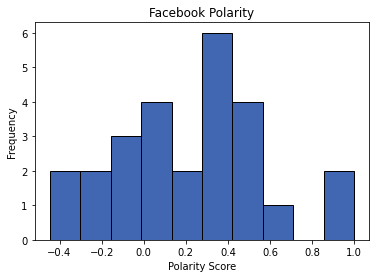

In [42]:
plt.hist(x=fb_df['fb_polar'], bins=10, color='#4267B2', edgecolor='#000000')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Facebook Polarity')
plt.show()

In [43]:
low_p = fb_df['fb_polar'] < 0.0

fb_df[low_p].head()

,fb_name,fb_text,fb_time,fb_polar,fb_subj
10,Michael Morris,5 for the s1k and 1 and a half for the h2. 🤣😂,2021-03-28,-0.166667,0.166667
11,Will Benefield,"Sick ride! I counted 4 wheelies, Derrek’s baby wheelie, and Ryan’s 3rd gear pull that lifted the nose a bit. 😂",2021-04-28,-0.446429,0.428571
19,Jakob Hall,At least 2,2021-05-21,-0.300000,0.400000
47,Charles Davis,Final answer 6 if you include cur scene from previous beemer,2021-03-28,-0.083333,0.583333
62,Eric Charles Curry,Right hand green side everyday,2021-05-26,-0.038095,0.478571


In [44]:
high_p = fb_df['fb_polar'] > .30

fb_df[high_p].head()

,fb_name,fb_text,fb_time,fb_polar,fb_subj
1,Daniel Jozwiak,Maybe 5. Others I think ur just ducking down. Still awesome ride.,2021-03-28,0.422222,0.644444
2,Dustin Montalvo,7. So how many miles is that bike gonna have when u give it away lol,2021-03-28,0.650000,0.600000
5,Mike Allen,You popped 8 maybe 9 if you count your tire coming an inch off the ground a wheelie lmao #Brrraaappppp!!,2021-03-28,0.937500,1.000000
8,Logan Chester Tenney,My fav number 8!!!! It’s meant to be!!!! My dream bike!!!!! Good luck to all!!!!,2021-03-28,1.000000,0.600000
15,Huey Uchiha,7 😅 idk but that H2! Haha looks sooo nice!,2021-03-28,0.475000,0.650000


_polarity needs fixing as you can see from dataframe above_

### Insta Polarity

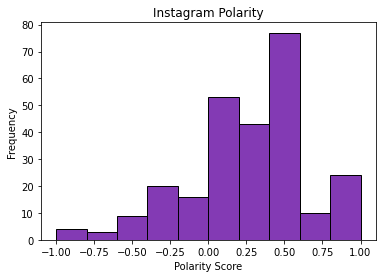

In [45]:
plt.hist(x=insta_df['insta_polar'], bins=10, color='#833AB4', edgecolor='#000000')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Instagram Polarity')
plt.show()

In [46]:
low_p = insta_df['insta_polar'] < 0.0

insta_df[low_p].head()

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
2,james_dodson13,I'll take slick to chipotle,1d2 likesReply,View replies (1),-0.250000,0.375
35,raised_by_wolves78,A really expensive Italian restaurant. Like a James bond level place.,18h1 likeReply,NaN,-0.250000,0.350
88,lanzerhernandez,I like this🔥 I have no more money to buy this😢,9hReply,NaN,-0.250000,0.500
95,24krepair,Buy everything Ride Clutch has you wont go wrong with nothing its the sport we ride for helping each other.. Plus a rider likes anything dealing with bikes. Appeal to a sticker we love it ..,3d1 likeReply,View replies (1),-0.041667,0.625
166,tevin_duke19,Dope as fuck,6d1 likeReply,NaN,-0.400000,0.600


In [47]:
high_p = insta_df['insta_polar'] > .60

insta_df[high_p].head()

,insta_name,insta_text,insta_time,no_reply,insta_polar,insta_subj
5,space2489eady,Oh no where lol but my house ima hide her in my garage until she listens to me 😂😂😂,23h1 likeReply,View replies (1),0.8,0.7
30,xw1.llx,prob ask her. Lol,18h1 likeReply,NaN,0.8,0.7
294,space2489eady,Oh no where lol but my house ima hide her in my garage until she listens to me 😂😂😂,1d1 likeReply,View replies (1),0.8,0.7
320,xw1.llx,prob ask her. Lol,21h1 likeReply,NaN,0.8,0.7
327,joseschwenck,Is I win the bike can she take me for a ride 😊☺☺,19mReply,NaN,0.8,0.4


_polarity needs fixing as you can see from dataframes above_

### Twitter Polarity

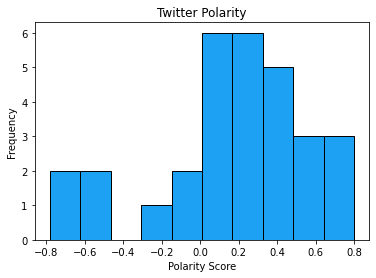

In [48]:
plt.hist(x=tweet_df['tweet_polar'], bins=10,color='#1DA1F2', edgecolor='black')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Twitter Polarity')
plt.show()

In [49]:
low_p = tweet_df['tweet_polar'] < 0.0

tweet_df[low_p].head()

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
2,SteveYa08701736,@RonCapps28 @gearwrench @LVMotorSpeedway I need this set so sorry but @RideClutch I need the set to fix the H2,2021-04-24,-0.500000,1.000000
8,emir_orbita,Thank you @rideclutch for choosing me as one of your random winners from your YouTube channel giveaway! I just got my prize today! #prizegiveaway #prizewinner #winner #nowfortheraffle😅 #crossingmyfingers 🤞 https://t.co/crpQuKMFrb,2021-01-22,-0.781250,0.500000
9,emir_orbita,Thank you @rideclutch for choosing me as one of your random winners from your YouTube channel giveaway! I just got my prize today! #prizegiveaway #prizewinner #winner #nowfortheraffle😅 #crossingmyfingers 🤞 https://t.co/NMUNyQioQz,2021-01-22,-0.781250,0.500000
13,GrabAdabAgoo,@rideclutch @ World Wide https://t.co/OVclEVnzyz,2020-11-25,-0.100000,0.400000
30,ducatistagram,"We are giving away this Ducati 899 + $1,000 CASH for Fantasy Motorcycle Giveaway #9 🏍💵📲 rideclutch Every $1 spent at https://t.co/0dJpTFUalc gets you 1 instant entry! + BONUS ENTRIES (Limited to America &amp; Canada) YOU… https://t.co/Ei2bTiUylA",2019-12-01,-0.057143,0.303175


In [50]:
high_p = tweet_df['tweet_polar'] > 0.5

tweet_df[high_p].head()

,tweet_name,tweet_text,tweet_time,tweet_polar,tweet_subj
4,Luimoto,Keep an eye out for more Luimoto Seat Covers on some upcoming Ride Clutch Give Aways! #Luimoto #HondaMotorcycles #HondaFireBlade #Motorcycles #MotorcycleAccessories #LuimotoDesignerSeatCovers #MadeinCanda #RideClutch https://t.co/ODSnn7IzBt,2021-04-13,0.625000,0.500000
5,WraithPhotos,"Lol thanks @rideclutch, it's perfect. @ Saint Cloud, Minnesota https://t.co/DUrvmIwTD8",2021-04-10,0.666667,0.633333
10,OliverHansHerre,"Praying to the Gods to win the Lotto, Pappy Van Winkle, and #rideclutch to win all of it and become the luckiest. Pray for me. #blessing #LotteryTickets #wishfulthinking",2021-01-19,0.800000,0.400000
24,Jesse96Ward,Couldn't have asked for a better day to be out with Bumblebee cruising some back roads today! Beautiful day with some beautiful views!! #photography #photoshoot #bikelife #daretolive #riderich #rideclutch… https://t.co/dTcoNzY8nq,2020-05-17,0.587500,0.625000
28,pazzo_racing,Posted withregram • rideclutch We could all use a Yamaha R1 + $5000.. So why not get entered to WIN? Go follow rideclutch and check out the link in their bio for info on how you could go home with this bike 😍 ps it… https://t.co/zVGm28nfd5,2020-01-29,0.800000,0.400000


_polarity needs fixing as you can see from dataframe above_

## Visualizing Word Freqency

Using the words.count, counting comments for frequency of words

**.lower() and in method(s) are more accurate for what is needed**

_Configured TextBlob words.count - need more testing_

_Not collecting all data relating to H2 or CBR. Need to figure out TextBlob and dataframes_

### H2 or CBR

H2: 5 for the s1k and 1 and a half for the h2. 🤣😂
H2: I'll go with the h2 all day
Here we go 🤞🤞
H2: 7 😅 idk but that H2! Haha looks sooo nice!
Honda: I would have to take the Honda.
H2: Team Kawi all day
Honda: FiREBLADE🔥🔥🔥🔥🔥🔥
Honda: Left, I can handle the cbr better‼️
H2: 🔥🔥h2🔥
H2: Kawasexy H2 😂😂
Honda: When I go right but there's nothing right.. but when I go left there's nothing left. But I still chose Fireblade!!
H2: H2 powered RR-R?
H2: H2
H2: there is no wrong answer ... but H2!
H2: 👏🙌h2
H2: H2
H2: H2
H2: H2 all day baby!!!!
Honda: 🔥🔪 Fireblade of course!
H2: H2!! Would be a dream come true!
Honda: Honda 😎
Honda: Sell Honda inspired rideclutch gear yoooooooo
H2: 🔥🔥h2🔥
H2: Kawasexy H2 😂😂
Honda: When I go right but there's nothing right.. but when I go left there's nothing left. But I still chose Fireblade!!
H2: H2 powered RR-R?
Honda: I’ve always been team Honda so it’d have to be the fireblade for me! H2 is clean though
H2: I’ve always been team Honda so it’d have to be the fireb

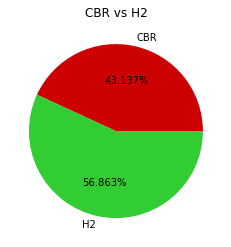

In [59]:
cbr = 0
h2 = 0

#print("FB:")
for line in fb_blob:
    if 'cbr' in line.lower() or 'honda' in line.lower() or 'fireblade' in line.lower():
        cbr = cbr + 1
        print(f"Honda: {line}")
    if 'h2' in line.lower() or 'kawa' in line.lower() or 'kawi' in line.lower():
        h2 = h2 + 1
        print(f"H2: {line}")

#print("\nInsta:")
for line in insta_blob:
    if 'cbr' in line.lower() or 'honda' in line.lower() or 'fireblade' in line.lower():
        cbr = cbr + 1
        print(f"Honda: {line}")   
    if 'h2' in line.lower() or 'kawa' in line.lower() or 'kawi' in line.lower():
        h2 = h2 + 1
        print(f"H2: {line}")

#print("\nTwitter")
for line in twitter_blob:
    if 'cbr' in line.lower() or 'honda' in line.lower() or 'fireblade' in line.lower():
        cbr = cbr + 1
        print(f"Honda: {line}")
    if 'h2' in line.lower() or 'kawa' in line.lower() or 'kawi' in line.lower():
        h2 = h2 + 1
        print(f"H2: {line}")

print(f"CBR: {cbr}\nH2: {h2}")

slices = [cbr, h2]
labels = ['CBR','H2']

plt.pie(slices, labels=labels, autopct='%1.3f%%',colors=['#CC0000','#32cd32'])
plt.title("CBR vs H2")
plt.show()

### Occurance of names

Slick: 4
Derwek: 10
Ryan: 7


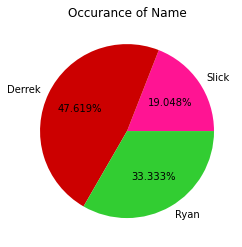

In [52]:
slick = 0
der = 0
ryan = 0

for line in fb_blob:
    if 'slick' in line.lower():
        slick = slick + 1
        #print(line)
    if 'derwek' in line.lower() or 'derrek' in line.lower():
        der = der + 1
        #print(line)
    if 'ryan' in line.lower():
        ryan = ryan + 1
        #print(line)

for line in insta_blob:
    if 'slick' in line.lower():
        slick = slick + 1
        #print(line)
    if 'derwek' in line.lower() or 'derrek' in line.lower():
        der = der + 1
        #print(line)
    if 'ryan' in line.lower():
        ryan = ryan + 1
        #print(line)

for line in twitter_blob:
    if 'slick' in line.lower():
        slick = slick + 1
        #print(line)
    if 'derwek' in line.lower() or 'derrek' in line.lower():
        der = der + 1
        #print(line)
    if 'ryan' in line.lower():
        ryan = ryan + 1
        #print(line)

print(f"Slick: {slick}\nDerwek: {der}\nRyan: {ryan}")

slices = [slick,der,ryan]
labels = ['Slick','Derrek','Ryan']

plt.pie(slices, labels=labels, autopct='%1.3f%%',colors=['#FF1493','#CC0000','#32cd32'])
plt.title("Occurance of Name")
plt.show()

## Data Accuracy Testing

In [61]:
# Data discovery to see what is more effective
for line in insta_blob:
    if "order" in line.lower():
        print(f"in line: {line}")

in line: I got my merch in! I love it! And also I didn’t really think I was going to get cash in my order! But I did! It was packed by Brandy! Thanks Brandy!
in line: @rideclutch @rideclutchryan @derwek yo I purchased the elite membership and it said 750 entries but on my order confirmation email it said I received 375 entries what’s up with that???
in line: These dudes gave me a dollar for over 200$ of merch ordered.


In [54]:
for line in insta_blob:
    if "h2" in line.lower():
        print(f"in line: {line}")
    if line.words.count('h2'):
        print(f"textblob: {line}\n")

in line: 🔥🔥h2🔥
in line: Kawasexy H2 😂😂
textblob: Kawasexy H2 😂😂

in line: H2 powered RR-R?
textblob: H2 powered RR-R?

in line: H2
textblob: H2

in line: there is no wrong answer ... but H2!
textblob: there is no wrong answer ... but H2!

in line: 👏🙌h2
in line: H2
textblob: H2

in line: H2
textblob: H2

in line: H2 all day baby!!!!
textblob: H2 all day baby!!!!

in line: H2!! Would be a dream come true!
textblob: H2!! Would be a dream come true!

in line: 🔥🔥h2🔥
in line: Kawasexy H2 😂😂
textblob: Kawasexy H2 😂😂

in line: H2 powered RR-R?
textblob: H2 powered RR-R?

in line: I’ve always been team Honda so it’d have to be the fireblade for me! H2 is clean though
textblob: I’ve always been team Honda so it’d have to be the fireblade for me! H2 is clean though

in line: H2
textblob: H2

in line: H2
textblob: H2

in line: H2 for sure!
textblob: H2 for sure!

in line: H2 !🔥
textblob: H2 !🔥

in line: H2
textblob: H2

in line: H2
textblob: H2

in line: H2
textblob: H2

in line: H2 😍
textblob: H2

In [64]:
for line in insta_blob:
    if "ship" in line.lower():
        print(f"in line: {line}")

in line: Depends if they can be shipped to Europe
in line: Need that green spaceship 👽
in line: @rideclutch @rideclutchryan @derwek yo I purchased the elite membership and it said 750 entries but on my order confirmation email it said I received 375 entries what’s up with that???
in line: Do you have to have a membership or anything or do you automatically get entered on any purchase?
in line: I bought a membership. If I win I’ll make your down payment on a bike and you gotta make mine if you win @m_overholser
in line: I will be whenever I get my membership thang sent this month
in line: May I know if the contest will ever open for oversea? I can suggest for the shipping and import tax maybe can deduct from the 15000 cash 😉


In [65]:
for line in insta_blob:
    if "bike" in line.lower():
        print(f"in line: {line}")

in line: Anywhere. Been bikeless this year 🥺
in line: The first sunday bike meet i come across!
in line: When a biker dude sees biker chick they say 🤤🤤🤤 and oh my goodness
in line: fuck the bike im takin @slickerspeed to Chipotle its her favorite restaurant!
in line: Are the prizes the keys to the bikes? 🔥💯💯
in line: I am still gonna stand by my Frankenbike idea
in line: If I win I’m selling the bike adding that money to the cash and paying off my hospital bills on April 7th I crashed my motorcycle broke both my legs fractured my back and had internal damage on my stomach and needed 4 surgery’s had a stroke during one of them and a lung collapse after coming off the ventilator I’m still currently in a rehab facility trying to get back up and walking been a long journey that I’m still Batting but I’m still alive and I get to be here for my wife and 3 kids be careful out there to all my bike family your life can change in a split second
in line: Buy everything Ride Clutch has you wont go

In [68]:
for line in insta_blob:
    if "site" in line.lower():
        print(f"in line: {line}")